In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
df[df.VIN == '1FDWF37P64EA24868']

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426746,7303723154,https://wyoming.craigslist.org/cto/d/pinedale-...,wyoming,https://wyoming.craigslist.org,17950,2004.0,ford,f350 super duty,excellent,8 cylinders,...,NaN,other,NaN,https://images.craigslist.org/00g0g_bRl7xLViO2...,F-350 Super Duty XLT 4x4 Power Stroke V8 Turbo...,NaN,wy,42.8543,-109.8561,2021-04-08T11:13:51-0600


In [9]:
print(df.description.iloc[360])#[df.VIN == '1FDBF2A66CEC73016'].description.astype(str)

** 2012 FORD F250 SD * V8 * UTILITY BED * GAS **  ** CLEAN CARFAX & TITLE **  ** 47K ORIGINAL LOW MILES * 1 OWNER **  ** 6.2L V8 **  ** CD PLAYER * TOW PACKAGE **  ** STORAGE BINS **  ** CALL OR STOP BY FOR A TEST DRIVE **  ** NO DOC FEES **  ~~ CALL - (706) 419-8570 ~~ ~~ TEXT @ (423) 595-2069 ~~  ** EXTENDED WARRANTY AVAILABLE ON ALL VEHICLES **  ~ CARFAX REPORTS ARE AVAILABLE TO VIEW FOR FREE, ON ALL VEHICLES, ON OUR WEBSITE ~  ~~~ WWW.TRUCKCOUNTRY777.COM ~~~  ** TRADE-INS WELCOME - PAID OFF OR NOT **  ~ TO APPLY FOR FINANCING PLEASE VISIT OUR WEBSITE OR GIVE US A CALL ~  ~~ CALL - (706) 419-8570 ~~ ~~ TEXT @ (423) 619-6812 ~~  TRUCK COUNTRY 253 PATTERSON AVE FORT OGLETHORPE GA 30742 (ONLY 5 MINUTES FROM CHATTANOOGA )  WWW.TRUCKCOUNTRY777.COM ~(WEBSITE)~  OPEN 6 DAYS A WEEK - SUNDAY BY APPOINTMENT  ** MONDAY - SATURDAY 10AM TO 6PM - **  ** SUNDAY BY APPOINTMENT ONLY **  *** ( WE CAN BE AVAILABLE BY APPOINTMENT OUTSIDE OF NORMAL HOURS ) ***  TO SEE ALL OF OUR AFFORDABLE-TOP QUALITY I

In [4]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [6]:
df.condition.value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [7]:
df.drop(df[df.condition.isin(['new','salvage'])].index, inplace=True)

In [8]:
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)

In [9]:
print(f"Earliest posting_date: {df.posting_date.min()} \nLatest posting_date: {df.posting_date.max()}")

Earliest posting_date: 2021-04-04 07:00:25+00:00 
Latest posting_date: 2021-05-05 04:24:09+00:00


In [10]:
print(f"Maximum price: {df.price.max()} $\nMinimum price: {df.price.min()} $")

Maximum price: 3736928711 $
Minimum price: 0 $


(array([5.2323e+04, 2.5642e+04, 3.3776e+04, 3.3660e+04, 2.8459e+04,
        2.1547e+04, 2.1186e+04, 2.1721e+04, 1.9595e+04, 1.8644e+04,
        1.3260e+04, 1.3611e+04, 1.4730e+04, 1.3680e+04, 1.4297e+04,
        1.0355e+04, 1.0477e+04, 1.0451e+04, 8.4580e+03, 1.0206e+04,
        3.9150e+03, 3.7150e+03, 3.2820e+03, 2.3910e+03, 2.7290e+03,
        1.2010e+03, 1.6260e+03, 1.4730e+03, 8.8700e+02, 1.4880e+03,
        4.1700e+02, 6.5200e+02, 7.8000e+02, 4.1700e+02, 8.3200e+02,
        2.6500e+02, 3.4900e+02, 2.9600e+02, 2.1100e+02, 3.7700e+02,
        9.6000e+01, 1.7300e+02, 1.7700e+02, 1.0900e+02, 1.2300e+02,
        3.6000e+01, 5.7000e+01, 5.2000e+01, 2.0000e+01, 1.1900e+02]),
 array([     0.,   2000.,   4000.,   6000.,   8000.,  10000.,  12000.,
         14000.,  16000.,  18000.,  20000.,  22000.,  24000.,  26000.,
         28000.,  30000.,  32000.,  34000.,  36000.,  38000.,  40000.,
         42000.,  44000.,  46000.,  48000.,  50000.,  52000.,  54000.,
         56000.,  58000.,  60000.,

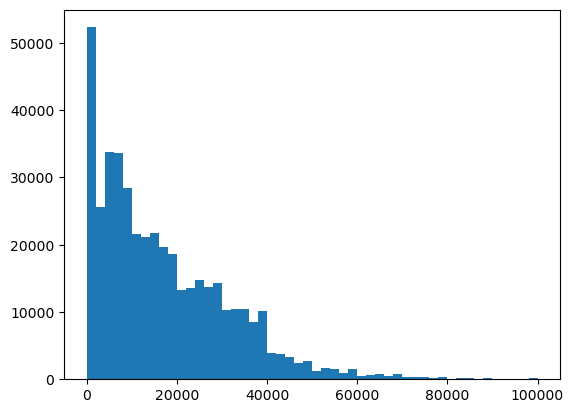

In [11]:
plt.hist(df.price, bins=50, range=[0,100000])

In [12]:
df.drop(df[df.price <= 500].index, inplace = True)

In [13]:
df.drop(df[df.price > 150000].index, inplace = True)

(array([9.5880e+03, 2.5642e+04, 3.3776e+04, 3.3660e+04, 2.8459e+04,
        2.1547e+04, 2.1186e+04, 2.1721e+04, 1.9595e+04, 1.8644e+04,
        1.3260e+04, 1.3611e+04, 1.4730e+04, 1.3680e+04, 1.4297e+04,
        1.0355e+04, 1.0477e+04, 1.0451e+04, 8.4580e+03, 1.0206e+04,
        3.9150e+03, 3.7150e+03, 3.2820e+03, 2.3910e+03, 2.7290e+03,
        1.2010e+03, 1.6260e+03, 1.4730e+03, 8.8700e+02, 1.4880e+03,
        4.1700e+02, 6.5200e+02, 7.8000e+02, 4.1700e+02, 8.3200e+02,
        2.6500e+02, 3.4900e+02, 2.9600e+02, 2.1100e+02, 3.7700e+02,
        9.6000e+01, 1.7300e+02, 1.7700e+02, 1.0900e+02, 1.2300e+02,
        3.6000e+01, 5.7000e+01, 5.2000e+01, 2.0000e+01, 1.1900e+02]),
 array([     0.,   2000.,   4000.,   6000.,   8000.,  10000.,  12000.,
         14000.,  16000.,  18000.,  20000.,  22000.,  24000.,  26000.,
         28000.,  30000.,  32000.,  34000.,  36000.,  38000.,  40000.,
         42000.,  44000.,  46000.,  48000.,  50000.,  52000.,  54000.,
         56000.,  58000.,  60000.,

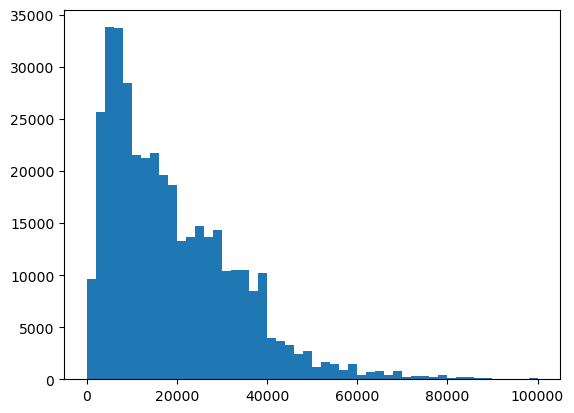

In [14]:
plt.hist(df.price, bins=50, range=[0,100000])

(array([7.00000e+00, 4.70000e+01, 4.06000e+02, 4.68000e+02, 1.33400e+03,
        3.27600e+03, 3.27400e+03, 7.39600e+03, 7.17550e+04, 2.74176e+05]),
 array([1900. , 1911.9, 1923.8, 1935.7, 1947.6, 1959.5, 1971.4, 1983.3,
        1995.2, 2007.1, 2019. ]),
 <BarContainer object of 10 artists>)

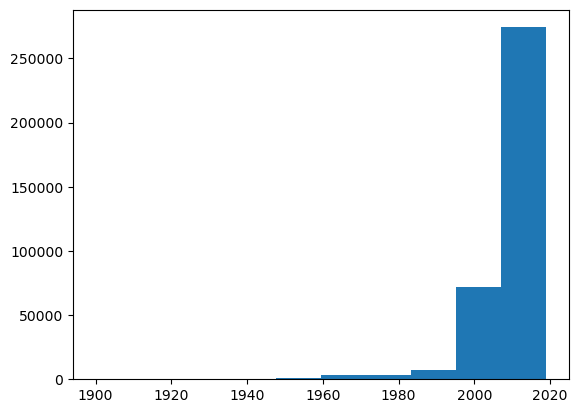

In [15]:
plt.hist(df.year[df['year'] < 2020])#.describe()

(array([  844.,   619.,  1963.,  1975.,  1642.,  1991.,  3273.,  7557.,
        31079., 77939.]),
 array([1950. , 1956.1, 1962.2, 1968.3, 1974.4, 1980.5, 1986.6, 1992.7,
        1998.8, 2004.9, 2011. ]),
 <BarContainer object of 10 artists>)

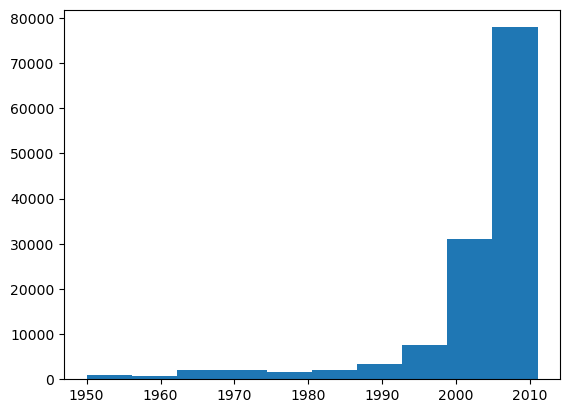

In [16]:
plt.hist(df.year[df['year'] < 2011], range=[1950, 2011])#.describe()

In [17]:
df.drop(df[df.year <= 1970].index, inplace = True)

C:\Users\mitch\AppData\Local\Temp\ipykernel_23928\2501215559.py:1: DtypeWarning: Columns (9,11,12,13,14,15,16,17,19,20,24,27,29,33,43,44,47,49,51,69,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df_spec = pd.read_csv('data/CarSpecs_1945_2020.csv')


,id_trim,Make,Modle,Generation,Year_from,Year_to,Series,Trim,Body_type,load_height_mm,...,front_suspension,steering_type,car_class,country_of_origin,number_of_doors,safety_assessment,rating_name,battery_capacity_KW_per_h,electric_range_km,charging_time_h
0,1,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,3.5 MT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.6 MT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.9 AT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 AT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#print(df.manufacturer.unique())
df = df[~df.manufacturer.isin(['harley-davidson', 'ferrari', 'datsun', 'morgan'])]
print(df.manufacturer.unique())


[nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'mini' 'pontiac' 'fiat' 'tesla' 'mercury' 'saturn' 'aston-martin'
 'land rover']


In [20]:
topmanus = df.manufacturer.unique().tolist()
topmanus.remove(np.nan)
print(topmanus)

['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram', 'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick', 'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo', 'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'mini', 'pontiac', 'fiat', 'tesla', 'mercury', 'saturn', 'aston-martin', 'land rover']


In [21]:
df.model[df.manufacturer.isnull()].value_counts()

model
Scion iM Hatchback 4D             640
smart fortwo Passion Hatchback    168
Genesis G80 3.8 Sedan 4D          163
International 4300                147
Scion xD Hatchback 4D             134
                                 ... 
Chevi Astro Van                     1
RAM1500 SLT HEMI CREW               1
F-8OO DUMP TRUCK                    1
Morton IL                           1
96 Suburban                         1
Name: count, Length: 4872, dtype: int64

In [22]:
old_car_makers = [x.upper() for x in ['Citreon', 'MG', 'Mokvich', 'DeSoto', 'Delage', 'GAZ', 'Lancia', 'Opel', 'Packard', 'Renault', 'Skoda', 'Tatra', 'Vauxhall']]
make_counts = {}

print(str(len(df[df.manufacturer.isin(old_car_makers)])))
print(str(len(df[df.model.isin(old_car_makers)])))
#for maker in old_car_makers:
    #df[df.description.str.upper().str.contains(maker)]

0
2


In [23]:
df[df.model.str.contains('Metris')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [ ]:
car_makers = [x.upper() for x in cars]
car_makers

In [ ]:
df_nomanu = df[df.manufacturer.isnull()].reset_index()
df_manu = df[~df.manufacturer.isnull()].reset_index()
df_nomanu.description.isnull().sum()
df_nomanu.shape

In [ ]:
df.model[df.model.str.upper().str.contains('SCION') & df.manufacturer.isnull()].describe()

print('There are 1806 rows out of 14,000 where manufacturer is null and is entered in the model column instead.')

In [ ]:
df.description[df.description.str.upper().str.contains('SCION') & df.manufacturer.isnull()].describe()

In [ ]:
df[df.id == 7302129327].description.astype(str)

In [ ]:
df[df.manufacturer.str.upper().str.contains('DODGE') & df.model.str.upper().str.contains('CHALLENGER')]

In [ ]:
df.VIN.value_counts()

In [ ]:
df[df.VIN == '1FMJU1JT1HEA52352'].price.describe()

In [29]:
df3 = df[df.VIN.notna()]
df2 = df3.drop_duplicates(subset='VIN')
df2.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48,2021-05-04 17:31:18+00:00
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,...,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48,2021-05-04 17:31:08+00:00
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48,2021-05-04 17:31:25+00:00
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48,2021-05-04 15:41:31+00:00
32,7316343444,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,...,NaN,pickup,black,https://images.craigslist.org/00V0V_ftJbKrOgdi...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48,2021-05-03 18:41:25+00:00


In [33]:
df2.VIN.is_unique

True

In [34]:
df2.shape

(101928, 26)

In [35]:
df4 = df[df.VIN.isnull()]
df4.shape

(142162, 26)

In [39]:
df2.to_csv('craigslist_withVins.csv', index=False)

In [ ]:
num_manu = 0
num_yr = 0

df_nomanu_noyr = df_nomanu[df_nomanu.year.isnull()].reset_index()
df_nomanu_yr = df_nomanu[~df_nomanu.year.isnull()].reset_index()
'''
for i, j in df_nomanu_noyr.iterrows():
    for yr in stringyears:
        if yr in model:
            num_yr += 1  

for i, j in df_nomanu.iterrows():
    #print(i)
    #desc = df_nomanu.iloc[i]['description']

    #print(desc)
    
    model = df_nomanu.iloc[i]['model']
    for brand in car_makers:
        if brand in model.upper():
            #print(brand)
            num_manu += 1
            
    #for car in car_makers:
        #if car in desc.upper():
            #print(car)
    #print('\n')

print('manus found:' + str(num_manu))

print('yrs found: ' + str(num_yr))
'''
df_nomanu_noyr.shape

#df_nomanu.iloc[0].model

In [ ]:
years = np.arange(1940, 2021)
years
stringyears = np.char.mod('%d', years)
stringyears
pattern = '|'.join(stringyears)
pattern

In [ ]:
df_noyear = df[df.year.isnull()].reset_index()
df_year = df[~df.year.isnull()].reset_index()
df.shape[0] == df_noyear.shape[0] + df_year.shape[0]

In [ ]:
#df_no_yeary = df_noyear[~df.description.isnull()]
df_noyear

In [ ]:
df_noyear_y = df_noyear[df_noyear.description.str.contains(pattern)]
df_noyear_n = df_noyear[~df_noyear.description.str.contains(pattern)]
df_noyear.shape[0] == (df_noyear_y.shape[0] + df_noyear_n.shape[0])

In [ ]:
df_noyear_y 

In [ ]:
df_noyear_y.isnull().sum()

In [ ]:
df_dupes = df[df.duplicated(subset=['paint_color','state','year','odometer','model','manufacturer','image_url','posting_date','cylinders'])]
df_dupes

In [ ]:
#def impute_year(edf, year):
    #edf.year = edf.year.apply()
'''
for i, j in df_noyear_y.iterrows():
    print(i)
    #desc = df_noyear_y.iloc[i]['description']
    #print(desc)

    for yr in stringyears:
        if yr in desc:
            print(yr)
    for brand in cars:
        if brand in desc.upper():
            print(brand)
    for car in cars:
        if car.upper() in desc.upper():
            print(car)
    print('\n')
''' 

df_noyear_y.iloc[78]
#df_noyear_y.index
            
    
#df_noyear_y['year'] = df_noyear_y['year'].apply()

In [ ]:
df_dupes2 = df[df.duplicated(subset=['paint_color','state','year','odometer','model','manufacturer','price'])]
df_dupes

In [ ]:
def impute_manufacturer(car_model):
    df.model[df.model.str.upper().str.contains(car_model) & df.manufacturer.isnull()].unique()

In [ ]:
df['description'].value_counts()

In [ ]:
for row in df_manu.iterrows():

In [ ]:
df = df[df['year'].notna()]
df = df[df['model'].notna()]
df = df[df['odometer'].notna()]